In [7]:
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np

%matplotlib inline

In [8]:
trk_filename = "***REMOVED***/share/wf_guiding/jw00646012001_gs-track_2020304193319_cal.fits"#/test_track_data.fits" # Replace with your filename, including it's full path
out_filename = "./jw00646012001_gs-track_2020304193319_cal_full_frame.fits" # Replace with where you want the file to be saved and it's new name

In [24]:
# Read in the TRACK image and get it's header
trk_image = fits.getdata(trk_filename)
trk_header = fits.getheader(trk_filename, ext=0)

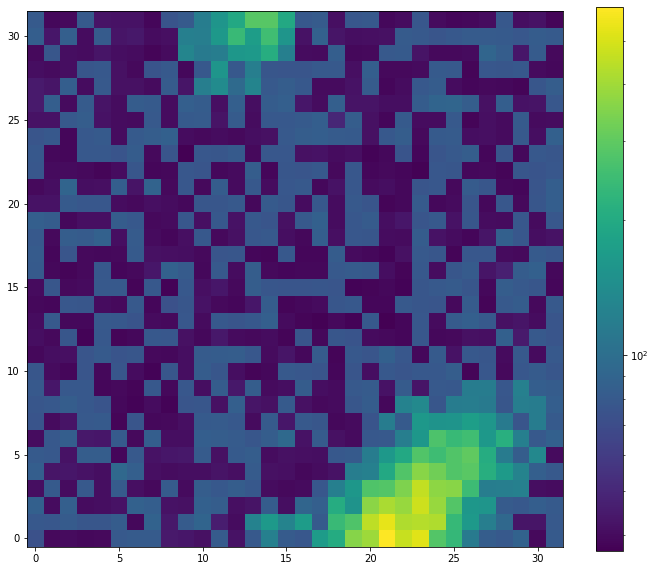

In [25]:
# Plot the first frame in the TRACK cube
plt.figure(figsize=(12, 10))
plt.imshow(trk_image[0], norm=LogNorm(), origin='lower') 
plt.colorbar()
plt.show()

Make a full size (2048x2048) image with the first frame of the track image cube

In [26]:
# Pad the TRACK image to a 2048x2048 sized image
trk_window = trk_image.shape[1] # This should be 32
print("Trk window size: {}".format(trk_window))
full_window = 2048

Trk window size: 32


In [28]:
# Pull location of postage stamp in the full frame from the header
# We need this for the step in MAGIC that will correct for distortion
x_corner = trk_header['SUBSTRT1'] #TODO: check that this is actually x
y_corner = trk_header['SUBSTRT2'] #TODO: check that this is actually y

In [33]:
trk_full_image = np.zeros((2048, 2048)) #np.pad(trk_image[0], pad_width=((full_window//2) - (trk_window//2)), mode='constant')
trk_full_image[x_corner:x_corner+trk_window, y_corner:y_corner+trk_window] = trk_image[0]

In [34]:
np.shape(trk_image)

(3072, 32, 32)

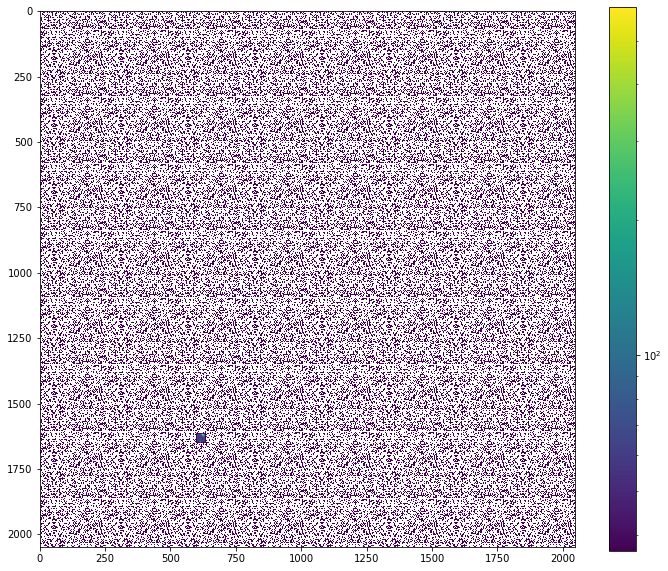

In [35]:
# Plot the padded image to make sure it looks good
plt.figure(figsize=(12, 10))
plt.imshow(trk_full_image, norm=LogNorm()) 
plt.colorbar()
plt.show()

In [36]:
hdul = fits.PrimaryHDU(data=trk_full_image, header=trk_header)

hdul.writeto(out_filename, overwrite=True) 